Findings

Most drugs have drasticaly different results
no corralation can be made betwen male and female mice and the effectiveness of the drugs
ouyt of these drugs:'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', Capomulin appears to be the most effective


In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "./Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
dF = pd.merge(study_results, mouse_metadata, on= 'Mouse ID')

# Display the data table for preview
dF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [56]:
repeat = dF.loc[dF.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
repeat

array(['g989'], dtype=object)

In [57]:
dF = dF.set_index('Mouse ID').drop(['g989'], axis = 0)
dfClean = dF.reset_index()

In [58]:
miceN = dfClean['Mouse ID'].nunique()
miceN

248

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# sStats = dfClean[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = dfClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = dfClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = dfClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = dfClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = dfClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({'Mean Tumor Volume': means,
                              'Median Tumor Volume': medians,
                              'Tumor Volume Variance': variances,
                              'Tumor Volume Std. Dev.': sds,
                              'Tumor Volume Std. Err.': sems})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = dfClean.groupby('Drug Regimen') \
                       .agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [62]:
# # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# mice_count = dfClean.groupby("Drug Regimen")[["Timepoints"]].nunique()
# mice_count = mice_count.iloc[:,0]
# x_axis = np.arange(len(mice_count))
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, mice_count.index,rotation="vertical")
# plt.bar(x_axis, mice_count, color='purple', alpha=0.5, align="center")
# plt.title("# of Mice per Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("# of Mice")
# plt.show()

<Axes: xlabel='Drug Regimen', ylabel='# of observed Timepoints'>

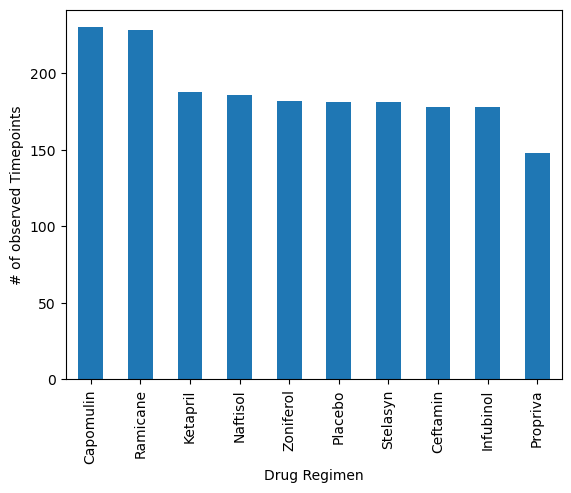

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drTp = dfClean.groupby('Drug Regimen')
drTpChart = drTp['Timepoint'].count().sort_values(ascending=False)
drTpChart
drTpChart.plot(kind = 'bar', xlabel= 'Drug Regimen', ylabel= '# of observed Timepoints')

In [65]:
# # Generate a pie plot showing the distribution of female versus male mice using Pandas
# plt.pie(,labels=mice_sex_count.index,autopct='%1.1f%%')
# plt.title("Mice per Sex")
# plt.ylabel('Sex')
# plt.show()
# # plt.xlabel('Drug Regimen')
# # plt.ylabel('Timepoint')

<Axes: ylabel='Sex'>

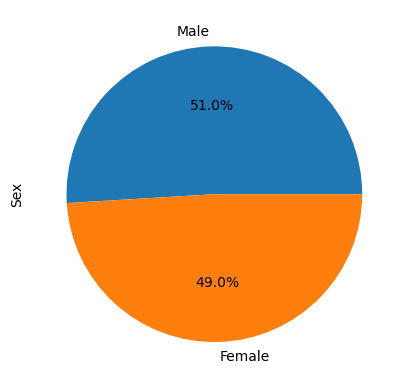

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fVM= dfClean.groupby('Sex')
fVMChart = fVM['Sex'].count().sort_values(ascending=False)
fVMChart
fVMChart.plot(kind = 'pie', ylabel= 'Sex', autopct="%.1f%%")


In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

maxTimepoint = dfClean.groupby('Mouse ID')['Timepoint'].max().reset_index().merge(dfClean, on = ['Mouse ID', 'Timepoint'])

# lastVolumeDF = dfClean.loc[maxTimepoint, ['Mouse ID', 'Tumor Volume (mm3)']]

# lastVolume = pd.merge(dfClean, lastVolumeDF, on=["Mouse ID"]).rename(columns = {'Tumor Volume (mm3)_y' : 'Last Tumor Volume'})

# lastVolume
maxTimepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [69]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumeData = {}
for drug in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    tumorVolumeData[drug] = maxTimepoint.loc[maxTimepoint['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    quartiles = tumorVolumeData[drug].quantile([.25,.5,.75])
    lowq = quartiles[0.25]
    uppq = quartiles[0.75]
    mean = tumorVolumeData[drug].mean()
    iqr = uppq - lowq
    lowbound = lowq - (1.5 * iqr)
    uppbound = uppq + (1.5 * iqr)
    outlier = tumorVolumeData[drug].loc[(lowbound > tumorVolumeData[drug]) | (tumorVolumeData[drug]> uppbound)].to_list()
    print(f'''
        {drug}: 
        outliers : {outlier}
            ''')

# print(tumorVolumeData)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    # 
type(tumorVolumeData)



        Capomulin: 
        outliers : []
            

        Ramicane: 
        outliers : []
            

        Infubinol: 
        outliers : [36.3213458]
            

        Ceftamin: 
        outliers : []
            


dict

Tumor Volume (mm3)    Axes(0.125,0.11;0.775x0.77)
dtype: object

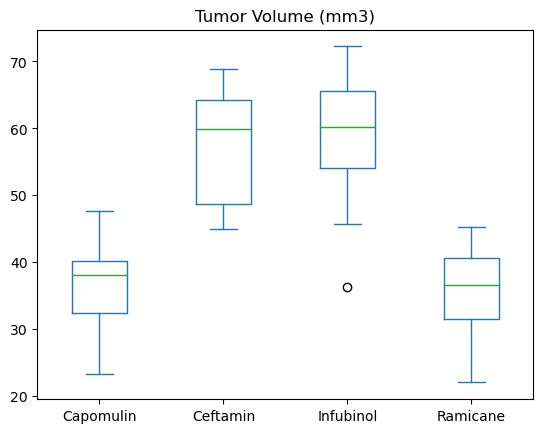

In [76]:
maxTimepoint[maxTimepoint['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])].plot.box(column='Tumor Volume (mm3)', by='Drug Regimen' )

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
miceN

248